In [3]:
import pandas as pd

In [4]:
data = "222810_processing_with_revision.xlsx"

In [5]:
df_gene1 = pd.read_excel(data,sheet_name="gene1",header=0)
df_gene2 = pd.read_excel(data,sheet_name="gene2",header=0)
df_name = pd.read_excel(data,sheet_name="name",header=0)

In [6]:
df_gene2.head()

,Sample Name,Accs,Treats,Reps,Gene2,Ct,Ct_std,Ct_mean,Delta_Ct,RQ,RQ_mean,STD
0,A11-1,A1,1,1,MATE2,22.517267,0.027114,22.544381,0.636560,0.643245,0.677693,0.034449
1,A11-1,A1,1,1,MATE2,22.571495,NaN,NaN,NaN,NaN,NaN,NaN
2,A11-2,A1,1,2,MATE2,21.780586,0.059478,21.721108,0.489763,0.712142,NaN,NaN
3,A11-2,A1,1,2,MATE2,21.661631,NaN,NaN,NaN,NaN,NaN,NaN
4,A11-3,A1,1,3,MATE2,22.538851,0.006895,22.531956,1.848400,NaN,NaN,NaN


In [7]:
df_name.head()

,No.,Name,AGG number,Type,Species
0,1,Bari2_074,49809,wild,C.retic
1,2,CudiB_008B,49871,wild,C.retic
2,3,Kayat_064,49969,wild,C.retic
3,4,Sarik_067,50033,wild,C.retic
4,5,Sarik_073,50035,wild,C.retic


## add accession name

In [8]:
df_name["No."] = "A"+df_name["No."].astype(str)

In [9]:
df_name.columns = ["Accs","Name","AGG number","Type","Species"]

In [10]:
df1 = df_gene1.merge(df_name,on="Accs",how="left")
df2 = df_gene2.merge(df_name,on="Accs",how="left")
df2.head()

,Sample Name,Accs,Treats,Reps,Gene2,Ct,Ct_std,Ct_mean,Delta_Ct,RQ,RQ_mean,STD,Name,AGG number,Type,Species
0,A11-1,A1,1,1,MATE2,22.517267,0.027114,22.544381,0.636560,0.643245,0.677693,0.034449,Bari2_074,49809,wild,C.retic
1,A11-1,A1,1,1,MATE2,22.571495,NaN,NaN,NaN,NaN,NaN,NaN,Bari2_074,49809,wild,C.retic
2,A11-2,A1,1,2,MATE2,21.780586,0.059478,21.721108,0.489763,0.712142,NaN,NaN,Bari2_074,49809,wild,C.retic
3,A11-2,A1,1,2,MATE2,21.661631,NaN,NaN,NaN,NaN,NaN,NaN,Bari2_074,49809,wild,C.retic
4,A11-3,A1,1,3,MATE2,22.538851,0.006895,22.531956,1.848400,NaN,NaN,NaN,Bari2_074,49809,wild,C.retic


## remove missing and outlier data

In [11]:
df1.RQ.notna()

0       True
1      False
2      False
3      False
4       True
       ...  
103    False
104     True
105    False
106    False
107    False
Name: RQ, Length: 108, dtype: bool

In [12]:
## based on RQ not NaN
DF1 = df1.loc[df1.RQ.notna(),:]
DF1 = DF1.loc[DF1.RQ!="missing",:]

DF2 = df2.loc[df2.RQ.notna(),:]
DF2 = DF2.loc[DF2.RQ!="missing",:]

In [13]:
DF1.shape

(40, 16)

In [14]:
DF2.shape

(41, 16)

In [15]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 104
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample Name  40 non-null     object 
 1   Accs         40 non-null     object 
 2   Treats       40 non-null     int64  
 3   Reps         40 non-null     int64  
 4   Gene1        40 non-null     object 
 5   Ct           40 non-null     float64
 6   Ct_std       40 non-null     float64
 7   Ct_mean      40 non-null     float64
 8   Delta_Ct     40 non-null     float64
 9   RQ           40 non-null     object 
 10  RQ_mean      16 non-null     float64
 11  STD          16 non-null     float64
 12  Name         40 non-null     object 
 13  AGG number   40 non-null     object 
 14  Type         40 non-null     object 
 15  Species      40 non-null     object 
dtypes: float64(6), int64(2), object(8)
memory usage: 5.3+ KB


In [16]:
DF1.head()

,Sample Name,Accs,Treats,Reps,Gene1,Ct,Ct_std,Ct_mean,Delta_Ct,RQ,RQ_mean,STD,Name,AGG number,Type,Species
0,A11-1,A1,1,1,MATE1,24.149744,0.014373,24.135371,2.227551,0.213521,0.230841,0.017321,Bari2_074,49809,wild,C.retic
4,A11-3,A1,1,3,MATE1,22.688765,0.005437,22.694201,2.010646,0.248162,NaN,NaN,Bari2_074,49809,wild,C.retic
6,A12-1,A1,2,1,MATE1,24.189497,0.058521,24.248018,3.414220,0.093803,0.078634,0.015169,Bari2_074,49809,wild,C.retic
10,A12-3,A1,2,3,MATE1,23.891428,0.040222,23.931650,3.977880,0.063466,NaN,NaN,Bari2_074,49809,wild,C.retic
12,A21-1,A2,1,1,MATE1,24.526041,0.017492,24.543533,2.515672,0.174867,0.228679,0.053812,CudiB_008B,49871,wild,C.retic


In [17]:
DF2.head()

,Sample Name,Accs,Treats,Reps,Gene2,Ct,Ct_std,Ct_mean,Delta_Ct,RQ,RQ_mean,STD,Name,AGG number,Type,Species
0,A11-1,A1,1,1,MATE2,22.517267,0.027114,22.544381,0.636560,0.643245,0.677693,0.034449,Bari2_074,49809,wild,C.retic
2,A11-2,A1,1,2,MATE2,21.780586,0.059478,21.721108,0.489763,0.712142,NaN,NaN,Bari2_074,49809,wild,C.retic
6,A12-1,A1,2,1,MATE2,19.413486,0.028029,19.385457,-1.448341,2.728941,2.328383,0.400558,Bari2_074,49809,wild,C.retic
10,A12-3,A1,2,3,MATE2,18.838886,0.167911,19.006797,-0.946974,1.927825,NaN,NaN,Bari2_074,49809,wild,C.retic
12,A21-1,A2,1,1,MATE2,24.547081,0.035826,24.582907,2.555045,0.170159,0.107906,0.062253,CudiB_008B,49871,wild,C.retic


In [18]:
##change RQ datatype
DF1["RQ"] = pd.to_numeric(DF1["RQ"],errors='coerce') ## change object to float
DF2["RQ"] = pd.to_numeric(DF2["RQ"],errors='coerce')

In [19]:
DF1.columns.to_list()

['Sample Name',
 'Accs',
 'Treats',
 'Reps',
 'Gene1',
 'Ct',
 'Ct_std',
 'Ct_mean',
 'Delta_Ct',
 'RQ',
 'RQ_mean',
 'STD',
 'Name',
 'AGG number',
 'Type',
 'Species']

In [20]:
cols = ['Sample Name',
 'Accs',
 'Treats',
 'Reps',
 'Gene',
 'Ct',
 'Ct_std',
 'Ct_mean',
 'Delta_Ct',
 'RQ',
 'RQ_mean',
 'STD',
 'Name',
 'AGG number',
 'Type',
 'Species']

In [21]:
DF1.columns = cols
DF2.columns = cols

In [22]:
DF_merged = pd.concat([DF1,DF2])

In [23]:
# A few helper functions:
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator

In [24]:
## create pairs for statistics calculation
LINES = DF_merged.Name.unique()
Treatment = ['0μM_Al', '15μM_Al']
pairs=[]
for line in LINES:
    pair = [(x,y) for x in [line] for y in Treatment]
    pairs.append(pair)

In [23]:
data_tem.head()

NameError: name 'data_tem' is not defined

In [24]:
control = data_tem.loc[data_tem.Treats==1,:].groupby("Name").RQ.describe()
treatment = data_tem.loc[data_tem.Treats==2,:].groupby("Name").RQ.describe()

NameError: name 'data_tem' is not defined

In [53]:
control[["mean"]].merge(treatment[["mean"]],left_index=True, right_index=True)

,mean_x,mean_y
Name,,
Bari2_074,0.677693,2.328383
CudiB_008B,0.107906,0.262568
Deste_063,0.331405,2.296439
Deste_064,0.188625,1.093724
Karab_062,0.831615,3.112556
Kayat_064,0.779153,3.369511
PBA_Pistol,0.405578,1.101751
Sarik_067,0.246062,1.981140
Sarik_073,0.396727,0.774200


In [57]:
fold.reset_index()

,Name,mean_x,mean_y,FC
0,Bari2_074,0.677693,2.328383,3.435747
1,CudiB_008B,0.107906,0.262568,2.433301
2,Deste_063,0.331405,2.296439,6.929405
3,Deste_064,0.188625,1.093724,5.798405
4,Karab_062,0.831615,3.112556,3.742783
5,Kayat_064,0.779153,3.369511,4.324585
6,PBA_Pistol,0.405578,1.101751,2.716493
7,Sarik_067,0.246062,1.981140,8.051377
8,Sarik_073,0.396727,0.774200,1.951469


In [63]:
range(1,2)

range(1, 2)

In [69]:
pairs

[[('Bari2_074', '0μM_Al'), ('Bari2_074', '15μM_Al')],
 [('CudiB_008B', '0μM_Al'), ('CudiB_008B', '15μM_Al')],
 [('Kayat_064', '0μM_Al'), ('Kayat_064', '15μM_Al')],
 [('Sarik_067', '0μM_Al'), ('Sarik_067', '15μM_Al')],
 [('Sarik_073', '0μM_Al'), ('Sarik_073', '15μM_Al')],
 [('Deste_063', '0μM_Al'), ('Deste_063', '15μM_Al')],
 [('Deste_064', '0μM_Al'), ('Deste_064', '15μM_Al')],
 [('Karab_062', '0μM_Al'), ('Karab_062', '15μM_Al')],
 [('PBA_Pistol', '0μM_Al'), ('PBA_Pistol', '15μM_Al')]]

In [71]:
data_tem.head()

,Sample Name,Accs,Treats,Reps,Gene,Ct,Ct_std,Ct_mean,Delta_Ct,RQ,RQ_mean,STD,Name,AGG number,Type,Species,Treatment
0,A11-1,A1,1,1,MATE1,24.149744,0.014373,24.135371,2.227551,0.213521,0.230841,0.017321,Bari2_074,49809,wild,C.retic,0μM_Al
4,A11-3,A1,1,3,MATE1,22.688765,0.005437,22.694201,2.010646,0.248162,NaN,NaN,Bari2_074,49809,wild,C.retic,0μM_Al
6,A12-1,A1,2,1,MATE1,24.189497,0.058521,24.248018,3.414220,0.093803,0.078634,0.015169,Bari2_074,49809,wild,C.retic,NaN
10,A12-3,A1,2,3,MATE1,23.891428,0.040222,23.931650,3.977880,0.063466,NaN,NaN,Bari2_074,49809,wild,C.retic,NaN
12,A21-1,A2,1,1,MATE1,24.526041,0.017492,24.543533,2.515672,0.174867,0.228679,0.053812,CudiB_008B,49871,wild,C.retic,0μM_Al


In [74]:
dict(zip(range(1,3), labels))

{1: '0μM_Al', 2: '15μM_Al'}

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


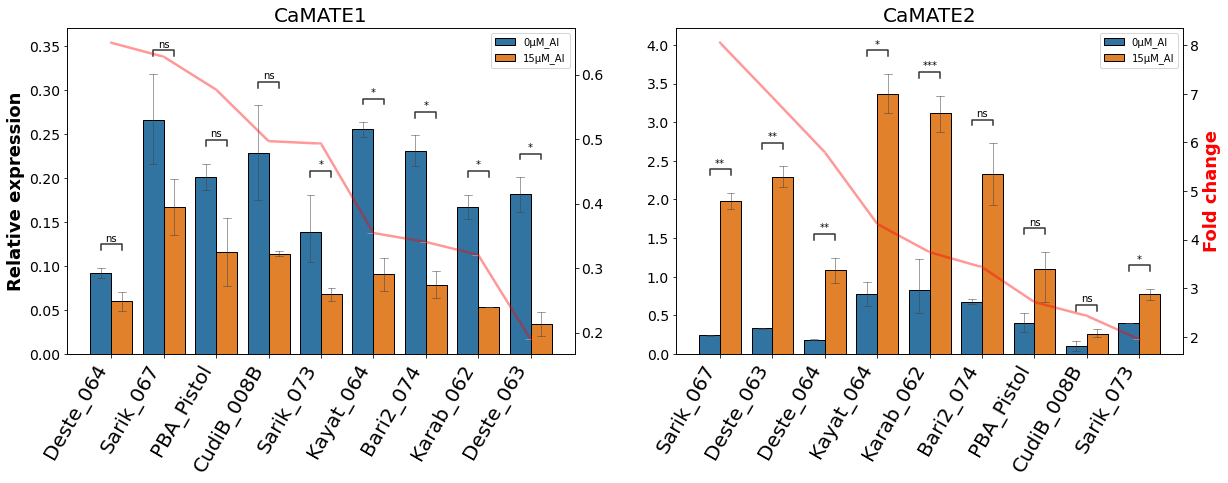

In [28]:
## looping to create subplots
genes = ['MATE1', 'MATE2']
fig,axs = plt.subplots(1,2,figsize=(20, 6))
plt.subplots_adjust(wspace=0.2)
#plt.suptitle("RT-PCR", fontsize=18, y=0.95)

for gene, ax in zip(genes, axs.ravel()):
    #filster data for gene
    data_tem=DF_merged.loc[DF_merged.Gene==gene,:]
    
    # Create new dataframe column with the labels instead of numbers
    labels = ['0μM_Al', '15μM_Al']
    data_tem["Treatment"] = data_tem["Treats"].map(dict(zip(range(1,3), labels)))
    
#     #calculate mean and get order
#     if gene == "MATE1":
#         data_ax = data_tem.loc[data_tem.Treatment==1,:].groupby("Name").RQ.describe()
#         sorter = data_ax.sort_values(by="mean", ascending=False).index.to_list()
#     else:
#         data_ax = data_tem.loc[data_tem.Treatment==2,:].groupby("Name").RQ.describe()
#         sorter = data_ax.sort_values(by="mean", ascending=False).index.to_list()
        
    #calculate fold changee and get order
    control = data_tem.loc[data_tem.Treats==1,:].groupby("Name").RQ.describe()
    treatment = data_tem.loc[data_tem.Treats==2,:].groupby("Name").RQ.describe()
    
    fold = control[["mean"]].merge(treatment[["mean"]],left_index=True, right_index=True)
    fold["FC"] = fold["mean_y"]/fold["mean_x"]
    
    sorter = fold.sort_values(by="FC",ascending=False).index.to_list()
    
    #plotting
    hue_plot_params = {
        "data":data_tem,
        'x': 'Name',
        'y': 'RQ',
        "hue": "Treatment",
        "order":sorter,
        "edgecolor":'black',
        "capsize":.15,
        "errwidth":0.5
    }
    sns.barplot(ax=ax,**hue_plot_params) # working
    # ax = sns.barplot(x="Name", y="mean", data=data) # not working
    
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_ind",verbose=False).apply_and_annotate()
    # chart formatting
    ax.set_title("Ca"+gene, fontsize=20)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(title='') # remove title, plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
    ax.set(xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60,
                       fontsize=20,
                         horizontalalignment='right')
    if gene=="MATE1":
        ax.set_ylabel('Relative expression', fontsize=18,fontweight="bold") # change y axis label
    else:
        ax.set_ylabel('', fontsize=18)
    
    ## add fold change secondary y axis
    ax2 = ax.twinx()
    sns.lineplot(x="Name", y="FC", data=fold.sort_values(by="FC",ascending=False).reset_index(),\
                 alpha=0.4, marker=False, ax=ax2, color="red", sort=False, linewidth = 2.5)
    
    ax2.tick_params(axis='both', labelsize=14)
    if gene=="MATE1":
        ax2.set_ylabel("", fontsize = 18)
    else:
        ax2.set_ylabel("Fold change", fontsize = 18,fontweight="bold",color="red")

#ax.legend(loc=(1.05, 1))
plt.show()

In [29]:
fig.savefig("RT-PCR_updated.png",dpi=300,bbox_inches="tight")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


NameError: name 'Annotator' is not defined

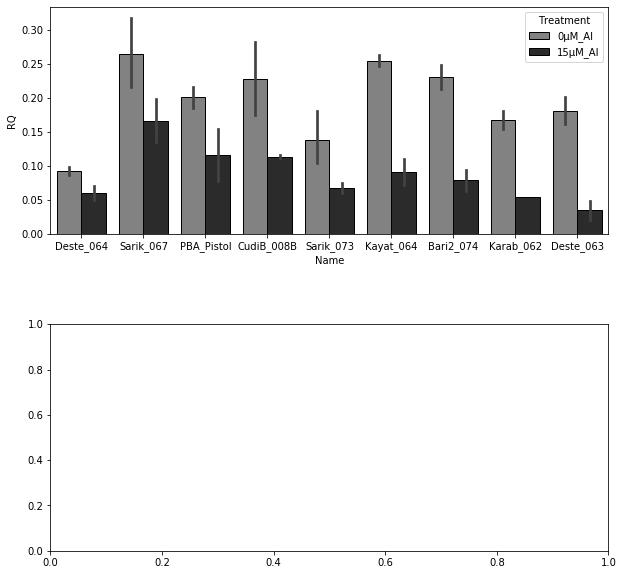

In [28]:
## looping to create subplots
genes = ['MATE1', 'MATE2']
fig,axs = plt.subplots(2,1,figsize=(10, 10))
plt.subplots_adjust(hspace=0.4)
#plt.suptitle("RT-PCR", fontsize=18, y=0.95)

for gene, ax in zip(genes, axs.ravel()):
    #filster data for gene
    data_tem=DF_merged.loc[DF_merged.Gene==gene,:]
    
    # Create new dataframe column with the labels instead of numbers
    labels = ['0μM_Al', '15μM_Al']
    data_tem["Treatment"] = data_tem["Treats"].map(dict(zip(range(1,3), labels)))
    
#     #calculate mean and get order
#     if gene == "MATE1":
#         data_ax = data_tem.loc[data_tem.Treatment==1,:].groupby("Name").RQ.describe()
#         sorter = data_ax.sort_values(by="mean", ascending=False).index.to_list()
#     else:
#         data_ax = data_tem.loc[data_tem.Treatment==2,:].groupby("Name").RQ.describe()
#         sorter = data_ax.sort_values(by="mean", ascending=False).index.to_list()
        
    #calculate fold changee and get order
    control = data_tem.loc[data_tem.Treats==1,:].groupby("Name").RQ.describe()
    treatment = data_tem.loc[data_tem.Treats==2,:].groupby("Name").RQ.describe()
    
    fold = control[["mean"]].merge(treatment[["mean"]],left_index=True, right_index=True)
    fold["FC"] = fold["mean_y"]/fold["mean_x"]
    
    sorter = fold.sort_values(by="FC",ascending=False).index.to_list()
    
    #plotting
    sns.set_context(rc = {'patch.linewidth': 1}) ## add edge outline
    hue_plot_params = {
        "data":data_tem,
        'x': 'Name',
        'y': 'RQ',
        "hue": "Treatment",
        "order":sorter,
        "palette":[Greys[3], Greys[5]],
        "edgecolor":'black'
    }
    sns.barplot(ax=ax,**hue_plot_params) # working
    # ax = sns.barplot(x="Name", y="mean", data=data) # not working
    
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_ind").apply_and_annotate()
    # chart formatting
    #ax.set_title("Ca"+gene, fontsize=20)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(title='') # add a label column instead
    ax.set(xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation=60,
                       fontsize=18,
                         horizontalalignment='right')

    ax.set_ylabel('Relative expression', fontsize=18) # change y axis label

    
    ## add fold change secondary y axis
    ax2 = ax.twinx()
    sns.lineplot(x="Name", y="FC", data=fold.sort_values(by="FC",ascending=False).reset_index(),\
                 alpha=0.4, marker=False, ax=ax2, color="red", sort=False)
    
    ax2.tick_params(axis='both', labelsize=14)
    ax2.set_ylabel("Fold change", fontsize = 18)

#ax.legend(loc=(1.05, 1))
plt.show()

In [27]:
Greys = sns.color_palette("Greys")

In [92]:
Greys[5]

(0.1679354094579008, 0.1679354094579008, 0.1679354094579008)